<a href="https://colab.research.google.com/github/vidhu-psit/MachineLearningPortfolio/blob/master/LinearRegression/GradientDecentCoding_SklearnLinearReg_RSquare_MSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Decent Coding



1. Load the data
2. Converted col. with yes/no to 1/0
3. convert furnishing status col to binary
4. Normalise the data
5. Select area a single feature(X)
6. Select Price as to be predected value(Y)
7. Visualize their relationship using scatter plot
8. Code gradient decent function
Assume m=0 and c=0 to start with
  8.2 Choose learning rate 0.1
  
Use following formula







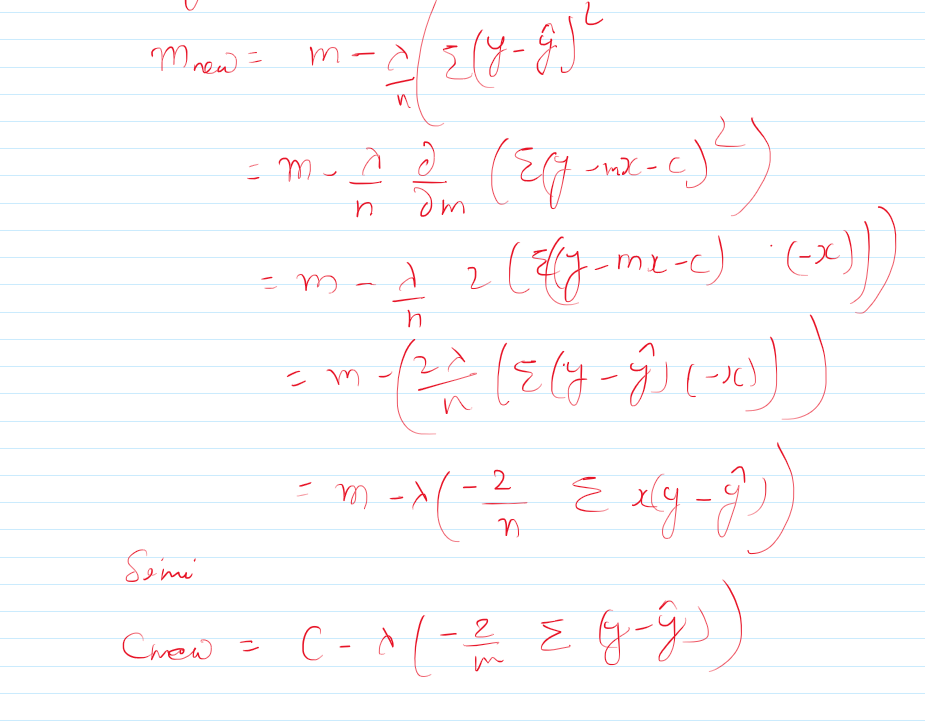

In [1]:
import pandas as pd
housing = pd.read_csv('https://raw.githubusercontent.com/divyabharathynadar/Bharat_Intern-M.L/refs/heads/main/House%20Price%20Prediction/Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
# Converting Yes to 1 and No to 0
housing['mainroad'] = housing['mainroad'].map({'yes': 1, 'no': 0})
housing['guestroom'] = housing['guestroom'].map({'yes': 1, 'no': 0})
housing['basement'] = housing['basement'].map({'yes': 1, 'no': 0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes': 1, 'no': 0})
housing['airconditioning'] = housing['airconditioning'].map({'yes': 1, 'no': 0})
housing['prefarea'] = housing['prefarea'].map({'yes': 1, 'no': 0})

In [3]:
#Converting furnishingstatus column to binary column using get_dummies
status = pd.get_dummies(housing['furnishingstatus'],drop_first=True)
housing = pd.concat([housing,status],axis=1)
housing.drop(['furnishingstatus'],axis=1,inplace=True)

In [4]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [5]:
# Normalisisng the data
housing = (housing - housing.mean())/housing.std()
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,4.562174,1.045766,1.402131,1.420507,1.376952,0.405251,-0.464888,-0.733865,-0.219063,1.471267,1.516299,1.803284,-0.844113,-0.69579
1,4.000809,1.755397,1.402131,5.400847,2.529700,0.405251,-0.464888,-0.733865,-0.219063,1.471267,2.676950,-0.553526,-0.844113,-0.69579
2,4.000809,2.216196,0.047235,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,-0.678439,1.516299,1.803284,1.182502,-0.69579
3,3.982096,1.082630,1.402131,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,1.471267,2.676950,1.803284,-0.844113,-0.69579
4,3.551716,1.045766,1.402131,-0.569663,0.224204,0.405251,2.147110,1.360148,-0.219063,1.471267,1.516299,-0.553526,-0.844113,-0.69579


In [6]:
# Assign feature variable X
X = housing['area']

# Assign response variable to y
y = housing['price']


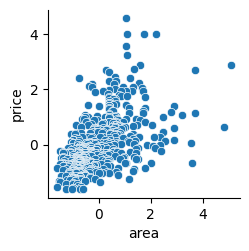

In [7]:
# Conventional way to import seaborn
import seaborn as sns

# To visualise in the notebook
%matplotlib inline
sns.pairplot(housing, x_vars='area', y_vars='price', kind='scatter')

In [8]:
import numpy as np
X = np.array(X)
y = np.array(y)

In [9]:
m_current=0
c_current=0
iters=100
learning_rate=0.1
gd_df = pd.DataFrame( columns = ['m_current', 'c_current','cost'])
for i in range(iters):
  y_hat = m_current * X + c_current
  N = len(y)
  cost = sum([data**2 for data in (y - y_hat)])/N
  m_grad = -2/N *sum(X * (y - y_hat))
  c_grad = -2/N *sum(y - y_hat)
  m_current = m_current - (learning_rate * m_grad)
  c_current = c_current - (learning_rate * c_grad)
  gd_df.loc[i] = [m_current,c_current,cost]
gd_df

,m_current,c_current,cost
0,0.107003,5.117211e-17,0.998165
1,0.192644,2.501567e-17,0.895098
2,0.261189,1.361602e-16,0.829074
3,0.316050,1.866804e-16,0.786780
4,0.359959,2.565939e-16,0.759687
...,...,...,...
95,0.535997,1.680205e-16,0.711399
96,0.535997,1.600351e-16,0.711399
97,0.535997,3.016547e-16,0.711399
98,0.535997,2.493418e-16,0.711399


<Axes: xlabel='index'>

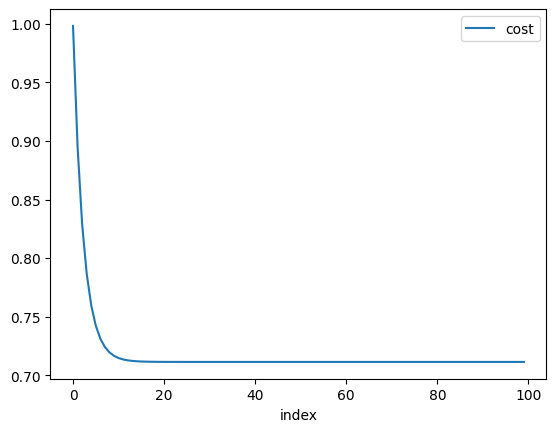

In [10]:
gd_df.reset_index().plot.line(x='index', y=['cost'])

Observation: After around 10th iteration error did not minimize further. Which means m i saround 5 and since c is very low let us make c as 0.
for Given data that is area vs cost of house the equation is
 **cost of the house =  0.5 * area**

> Add blockquote



In [11]:
m_current = 0.5
c_current = 0
y_pred = m_current *X + c_current

In [12]:
y_pred

array([ 5.22882774e-01,  8.77698425e-01,  1.10809820e+00,  5.41314756e-01,
        5.22882774e-01,  5.41314756e-01,  7.90146511e-01,  2.54579279e+00,
        6.79554620e-01,  1.38115152e-01,  1.85459346e+00,  1.95715096e-01,
        3.22434971e-01, -3.80284338e-01,  6.10434688e-01,  1.95715096e-01,
        3.33954960e-01,  7.71714529e-01, -1.26844587e-01,  2.92483001e-01,
       -1.91356524e-01,  4.61826834e-01,  6.68034631e-01, -1.36060578e-01,
        8.40834461e-01,  3.20130973e-01,  1.95715096e-01,  8.58114444e-01,
        6.44994654e-01,  8.05152089e-02,  5.35554762e-01,  4.26114869e-01,
       -6.23326506e-02,  1.86499105e-01,  3.89250905e-01,  4.26114869e-01,
        5.37167560e-01,  8.86914416e-01,  1.95715096e-01,  1.95715096e-01,
        3.22434971e-01,  2.78659014e-01,  3.06306987e-01,  1.95715096e-01,
        1.95715096e-01,  1.95715096e-01,  1.95715096e-01,  3.33954960e-01,
       -1.95964519e-01,  5.27490769e-01,  5.27490769e-01,  2.70595022e-01,
        1.95715096e-01, -

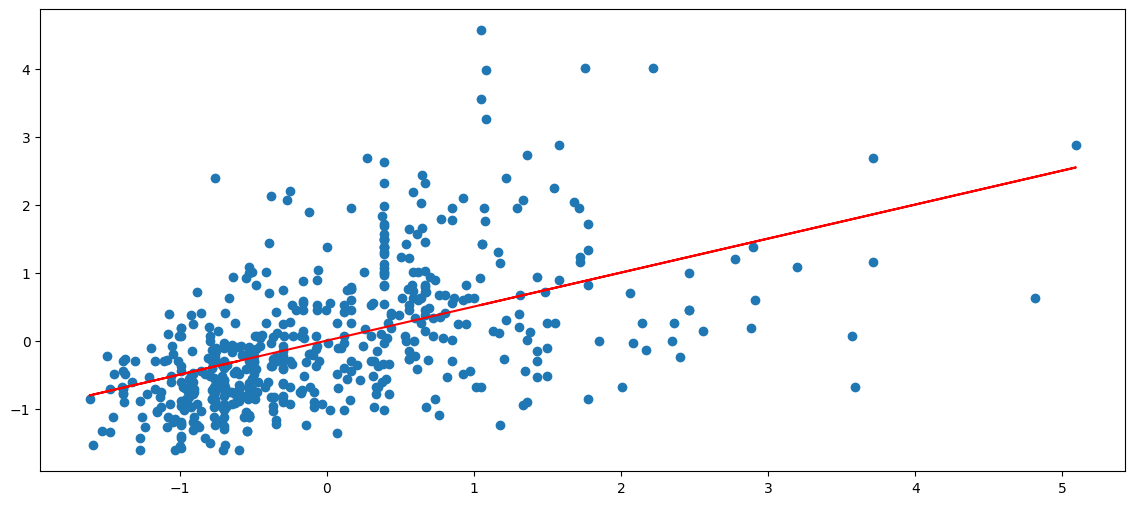

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.scatter(X,y)
plt.plot(X,y_pred,"r")
plt.show()

# sklearn gives the same result

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression()

In [16]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [17]:
lr.fit(X,y)

LinearRegression()

In [18]:
lr.coef_

array([[0.53599735]])

In [19]:
lr.intercept_

array([1.88156516e-16])

In [21]:
y_pred = lr.predict(X)
y_pred

array([[ 5.60527558e-01],
       [ 9.40888053e-01],
       [ 1.18787539e+00],
       [ 5.80286545e-01],
       [ 5.60527558e-01],
       [ 5.80286545e-01],
       [ 8.47032866e-01],
       [ 2.72907635e+00],
       [ 7.28478945e-01],
       [ 1.48058710e-01],
       [ 1.98811435e+00],
       [ 2.09805544e-01],
       [ 3.45648577e-01],
       [-4.07662792e-01],
       [ 6.54382745e-01],
       [ 2.09805544e-01],
       [ 3.57997944e-01],
       [ 8.27273879e-01],
       [-1.35976724e-01],
       [ 3.13540224e-01],
       [-2.05133178e-01],
       [ 4.95075914e-01],
       [ 7.16129579e-01],
       [-1.45856218e-01],
       [ 9.01370079e-01],
       [ 3.43178704e-01],
       [ 2.09805544e-01],
       [ 9.19894129e-01],
       [ 6.91430845e-01],
       [ 8.63118765e-02],
       [ 5.74111861e-01],
       [ 4.56792878e-01],
       [-6.68202706e-02],
       [ 1.99926050e-01],
       [ 4.17274904e-01],
       [ 4.56792878e-01],
       [ 5.75840773e-01],
       [ 9.50767546e-01],
       [ 2.0

In [22]:
from sklearn.metrics import mean_squared_error
mse_value = mean_squared_error(y, y_pred)

print(f"The Mean Squared Error is: {mse_value}")


The Mean Squared Error is: 0.7113991263366148


# using sklearn to predict house price using all the columns in the dataset

In [23]:

housing.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,4.562174,1.045766,1.402131,1.420507,1.376952,0.405251,-0.464888,-0.733865,-0.219063,1.471267,1.516299,1.803284,-0.844113,-0.69579
1,4.000809,1.755397,1.402131,5.400847,2.529700,0.405251,-0.464888,-0.733865,-0.219063,1.471267,2.676950,-0.553526,-0.844113,-0.69579


In [28]:
X = housing.iloc[:,1:]

In [29]:
y = housing["price"]

In [30]:
lr.fit(X,y)

LinearRegression()

In [31]:
lr.coef_

array([ 0.28325795,  0.04529446,  0.26532437,  0.2090991 ,  0.07852177,
        0.06151278,  0.08938767,  0.09576867,  0.21511586,  0.12764461,
        0.14780027, -0.012226  , -0.1032027 ])

In [32]:
lr.intercept_

np.float64(2.2183843195700336e-16)

In [33]:
y_pred = lr.predict(X)
mse_value = mean_squared_error(y, y_pred)

print(f"The Mean Squared Error is: {mse_value}")

The Mean Squared Error is: 0.31761430162681803


In [34]:
from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred)
print(f"The R-squared value is: {r2}")

The R-squared value is: 0.681801848554014
